In [55]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

X = cancer.data
X_train = X[:, :2]
y_train = cancer.target
z = cancer.target_names


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math


In [57]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (569, 2)
The shape of y_train is: (569,)
We have m = 569 training examples


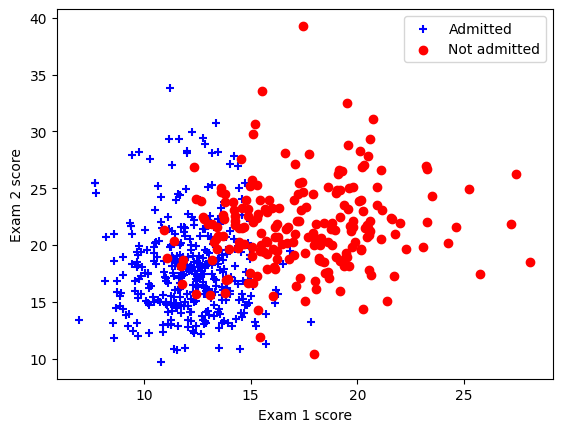

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y, pos_label, neg_label):
    # Plot positive examples
    pos_indices = np.where(y == 1)[0]
    plt.scatter(X[pos_indices, 0], X[pos_indices, 1], marker='+', color='blue', label=pos_label)

    # Plot negative examples
    neg_indices = np.where(y == 0)[0]
    plt.scatter(X[neg_indices, 0], X[neg_indices, 1], marker='o', color='red', label=neg_label)

    # Set labels and legend
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()

# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.show()

In [59]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1 + np.exp(-z))
    
    return g

In [60]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
    loss_sum = 0;
    
    for i in range(m):
        
        z_wb = 0;
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = w[j] * X[i][j]
            z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
    
        z_wb += b # equivalent to z_wb = z_wb + b
        
        f_wb =  sigmoid(z_wb) 
        # Your code here to calculate prediction f_wb for a training example
        loss = -(y[i]*np.log(f_wb) + (1-y[i])*np.log(1 - f_wb))
        # Your code here to calculate loss for a training example

        loss_sum += loss # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum                 
    
    ### END CODE HERE ### 

    return total_cost

In [61]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)
        err_i= f_wb_i - y[i] 
        for j in range(n): 
            dj_dw[j] += err_i*x[i,j]

        dj_db += err_i
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [62]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [63]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [64]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     4.82   
Iteration 1000: Cost     1.34   
Iteration 2000: Cost     1.32   
Iteration 3000: Cost     1.31   
Iteration 4000: Cost     1.30   
Iteration 5000: Cost     1.29   
Iteration 6000: Cost     1.28   
Iteration 7000: Cost     1.27   
Iteration 8000: Cost     1.26   
Iteration 9000: Cost     1.24   
Iteration 9999: Cost     1.23   


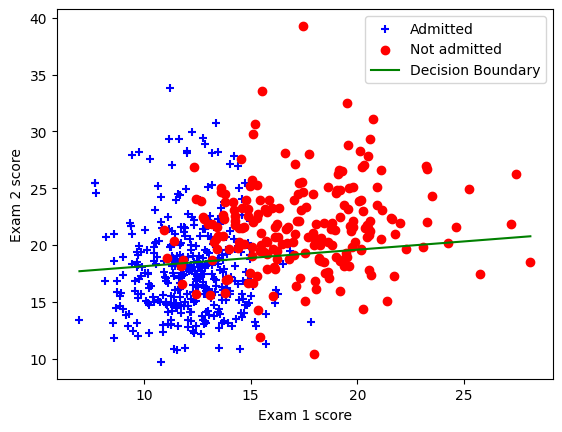

In [65]:

# Plot examples
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not admitted")

# Plot the predicted line
x_line = np.array([np.min(X_train[:, 0]), np.max(X_train[:, 0])])
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, color='green', label='Decision Boundary')

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()